In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The data contains the features like body temperature , heart rate ,  gender ,
bpm and tells us about whether the person is ill or not depending on those features..

In [2]:
health_data = pd.read_csv('health_data.csv')
health_data.head()

,id,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
0,1,male,66.0,70,38.6,88.0,75,1
1,2,female,56.0,74,39.6,88.0,70,1
2,3,male,46.0,82,37.2,98.0,83,0
3,4,female,60.0,90,38.6,98.0,75,0
4,5,male,58.0,72,39.6,93.0,78,1


In [3]:
n_rows = health_data.shape[0]
n_cols = health_data.shape[1]
print(f"The data has {n_rows} rows and {n_cols} columns")

The data has 1085 rows and 8 columns


***Cleaning and Analysing the data***

In [4]:
health_data['gender'].isnull().sum()


183

In [5]:
health_data_not_missing = health_data.dropna(axis=0)

In [6]:
health_data_not_missing.isna().sum().sum()

0

*Gender and Age* feature have some values which are *missing* in the dataset ..They can not be replaced with any *random values* so we have to drop the rows containing the *nan values*

In [7]:
health_data_not_missing

,id,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
0,1,male,66.0,70,38.6,88.0,75,1
1,2,female,56.0,74,39.6,88.0,70,1
2,3,male,46.0,82,37.2,98.0,83,0
3,4,female,60.0,90,38.6,98.0,75,0
4,5,male,58.0,72,39.6,93.0,78,1
...,...,...,...,...,...,...,...,...
1027,1028,male,58.0,110,38.0,30.0,72,1
1029,1030,female,27.0,109,38.0,30.0,64,1
1030,1031,female,25.0,109,38.0,30.0,60,1
1052,1053,female,45.0,107,38.0,30.0,68,1


In [8]:
health_data_not_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 1084
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               825 non-null    int64  
 1   gender           825 non-null    object 
 2   age              825 non-null    float64
 3   heart_rate       825 non-null    int64  
 4   temperature      825 non-null    float64
 5   SpO2_saturation  825 non-null    float64
 6   bpm              825 non-null    int64  
 7   Health_status    825 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 58.0+ KB


In [9]:
health_data_not_missing.describe()

,id,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,467.604848,49.755758,85.753939,38.685091,69.458182,69.880000,0.869091
std,287.832739,17.991875,18.855192,5.253758,29.375158,12.848025,0.337506
min,1.000000,0.500000,47.000000,36.000000,20.000000,44.000000,0.000000
25%,237.000000,35.000000,69.000000,38.000000,30.000000,58.000000,1.000000
50%,448.000000,51.000000,84.000000,38.100000,82.000000,70.000000,1.000000
75%,681.000000,64.000000,105.000000,38.500000,89.000000,80.000000,1.000000
max,1085.000000,96.000000,120.000000,95.000000,340.000000,106.000000,1.000000


In [10]:
health_data_not_missing[health_data_not_missing.Health_status == 1].count()

id                 717
gender             717
age                717
heart_rate         717
temperature        717
SpO2_saturation    717
bpm                717
Health_status      717
dtype: int64

So we can see we have 717 with infected and left overs are non - infected . So the data is unbalanced.

In [11]:
health_data_not_gender = health_data_not_missing.iloc[0:,2:]
health_data_not_gender.corr()

,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
age,1.000000,0.095691,0.092781,0.033522,0.068617,0.071672
heart_rate,0.095691,1.000000,-0.022910,-0.113722,0.303306,0.089903
temperature,0.092781,-0.022910,1.000000,0.052418,0.015547,0.055363
SpO2_saturation,0.033522,-0.113722,0.052418,1.000000,0.180150,-0.436401
bpm,0.068617,0.303306,0.015547,0.180150,1.000000,-0.085629
Health_status,0.071672,0.089903,0.055363,-0.436401,-0.085629,1.000000


In [12]:
health_data_not_missing.temperature

0       38.6
1       39.6
2       37.2
3       38.6
4       39.6
        ... 
1027    38.0
1029    38.0
1030    38.0
1052    38.0
1084    38.0
Name: temperature, Length: 825, dtype: float64

In [120]:
temperature_series = health_data_not_missing.temperature
n = temperature_series.size
temperature_series.__class__
for i in range(n):
    if(temperature_series.iloc[i] > 80.0):
         Fahrenheit= temperature_series.iloc[i]
         Celsius = ((Fahrenheit-32)*5)/9
         temperature_series.iloc[i] = Celsius

In [14]:
temperature_series_df = pd.DataFrame(temperature_series)
health_data_not_missing

,id,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
0,1,male,66.0,70,38.6,88.0,75,1
1,2,female,56.0,74,39.6,88.0,70,1
2,3,male,46.0,82,37.2,98.0,83,0
3,4,female,60.0,90,38.6,98.0,75,0
4,5,male,58.0,72,39.6,93.0,78,1
...,...,...,...,...,...,...,...,...
1027,1028,male,58.0,110,38.0,30.0,72,1
1029,1030,female,27.0,109,38.0,30.0,64,1
1030,1031,female,25.0,109,38.0,30.0,60,1
1052,1053,female,45.0,107,38.0,30.0,68,1


In [15]:
health_data_not_missing

,id,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
0,1,male,66.0,70,38.6,88.0,75,1
1,2,female,56.0,74,39.6,88.0,70,1
2,3,male,46.0,82,37.2,98.0,83,0
3,4,female,60.0,90,38.6,98.0,75,0
4,5,male,58.0,72,39.6,93.0,78,1
...,...,...,...,...,...,...,...,...
1027,1028,male,58.0,110,38.0,30.0,72,1
1029,1030,female,27.0,109,38.0,30.0,64,1
1030,1031,female,25.0,109,38.0,30.0,60,1
1052,1053,female,45.0,107,38.0,30.0,68,1


In [16]:
import seaborn as sns
import plotly.express as px

In [17]:
px.scatter(health_data_not_missing  , x = 'bpm' , y = 'SpO2_saturation', color='Health_status')

In [18]:
px.histogram(health_data_not_missing, x= 'bpm', color='Health_status')

In [19]:
px.histogram(health_data_not_missing, x= 'heart_rate', color='Health_status')

In [20]:
px.violin(health_data_not_missing , x='Health_status' , y='age')

In [21]:
px.strip(health_data_not_missing , x='Health_status' , y='SpO2_saturation')

In [22]:
px.strip(health_data_not_missing , x='Health_status' , y='temperature')

In [23]:
fig = px.scatter_3d(health_data_not_missing, x='age', y='SpO2_saturation', z='bpm',
              color='Health_status')
fig.show()

We can make many inferences by analysing the data.
1. SpO2_saturation is negatively correlated with health status
2. Normal Healthy heart rate lies between 60 to 100 . Most of the unhealthy persons have higher heart rate
3. bpm for healthy person lies in the range of 70 to 90 and most of the unhealthy persons have lower bpm.
4. Temperature does not show a good relation with health 
5. Some of the temperature reported is in farenheit so we need to change them to celsius

Dividing the dataset into ***input and target features***

In [24]:
input_cols = list(health_data_not_missing.columns[1:-1])
input_cols
output_cols = 'Health_status'

In [25]:
input_df = health_data_not_missing[input_cols].copy()
input_df
output_df = health_data_not_missing[output_cols].copy()
output_df

0       1
1       1
2       0
3       0
4       1
       ..
1027    1
1029    1
1030    1
1052    1
1084    1
Name: Health_status, Length: 825, dtype: int64

***Scaling*** the dataset

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [27]:
cols_scaled = input_cols[1:]
cols_scaled

['age', 'heart_rate', 'temperature', 'SpO2_saturation', 'bpm']

In [28]:
scaler = StandardScaler()
scaler = StandardScaler().fit(input_df[cols_scaled])

minscaler = MaxAbsScaler()
minscaler = MaxAbsScaler().fit(input_df[cols_scaled])

In [29]:
input_df[cols_scaled] = minscaler.transform(input_df[cols_scaled])
input_df

,gender,age,heart_rate,temperature,SpO2_saturation,bpm
0,male,0.687500,0.583333,0.965,0.258824,0.707547
1,female,0.583333,0.616667,0.990,0.258824,0.660377
2,male,0.479167,0.683333,0.930,0.288235,0.783019
3,female,0.625000,0.750000,0.965,0.288235,0.707547
4,male,0.604167,0.600000,0.990,0.273529,0.735849
...,...,...,...,...,...,...
1027,male,0.604167,0.916667,0.950,0.088235,0.679245
1029,female,0.281250,0.908333,0.950,0.088235,0.603774
1030,female,0.260417,0.908333,0.950,0.088235,0.566038
1052,female,0.468750,0.891667,0.950,0.088235,0.641509


In [35]:
categorical_cols = input_df.select_dtypes('object').columns.tolist()

**One Hot encoding** the gender features

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(input_df[categorical_cols])

OneHotEncoder(sparse_output=False)

In [44]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['gender_female', 'gender_male']


In [45]:
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
input_df

,gender,age,heart_rate,temperature,SpO2_saturation,bpm,gender_female,gender_male
0,male,0.687500,0.583333,0.965,0.258824,0.707547,0.0,1.0
1,female,0.583333,0.616667,0.990,0.258824,0.660377,1.0,0.0
2,male,0.479167,0.683333,0.930,0.288235,0.783019,0.0,1.0
3,female,0.625000,0.750000,0.965,0.288235,0.707547,1.0,0.0
4,male,0.604167,0.600000,0.990,0.273529,0.735849,0.0,1.0
...,...,...,...,...,...,...,...,...
1027,male,0.604167,0.916667,0.950,0.088235,0.679245,0.0,1.0
1029,female,0.281250,0.908333,0.950,0.088235,0.603774,1.0,0.0
1030,female,0.260417,0.908333,0.950,0.088235,0.566038,1.0,0.0
1052,female,0.468750,0.891667,0.950,0.088235,0.641509,1.0,0.0


In [66]:
input_df.drop(['gender'] , axis=1 , inplace=True)

Dividing the Dataset into *training and test set*

In [67]:
from sklearn.model_selection import train_test_split

In [79]:
input_train,input_test,train_target,test_target = train_test_split(input_df,output_df,test_size=0.2,random_state=42)

**Training and Testing** the model

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model1 = LogisticRegression(solver='liblinear' , random_state=42)

In [82]:
model1.fit(input_train,train_target)

LogisticRegression(random_state=42, solver='liblinear')

In [83]:
pred = model1.predict(input_train)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(train_target,pred)

0.8651515151515151

In [86]:
pred_test = model1.predict(input_test)

In [87]:
accuracy_score(test_target,pred_test)

0.8909090909090909

In [88]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(train_target,pred,normalize='true')

<Axes: >

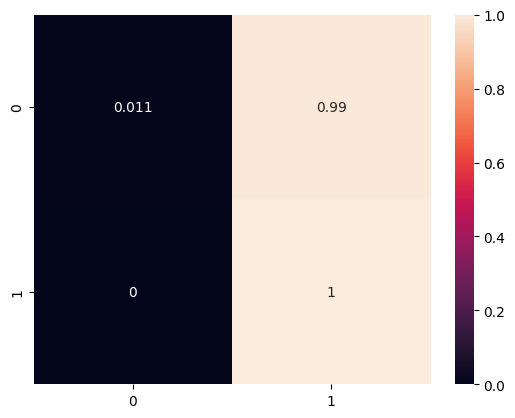

In [89]:
sns.heatmap(mat,annot=True)

Training the *Random Forest Classifier*

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
model2 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=4,max_depth=3)
model2.fit(input_train,train_target)

RandomForestClassifier(max_depth=3, n_estimators=4, n_jobs=-1, random_state=42)

In [118]:
model2.score(input_train,train_target)

0.9636363636363636

In [119]:
model2.score(input_test,test_target)

0.9757575757575757

Changing the new input features to the required features